In [1]:
%matplotlib inline
import pandas as pd
import numpy as np

# Definitions
## Option price
Assuming underlying forward rate follows Normal distribution:
$$
{\rm d} F_t = \mu dt + \sigma dW_t,
$$
The price for a call option can be described as below:
$$
C = \left( F - K \right) N \left( d \right) + \sigma \sqrt{\tau} n \left( d \right), \\
d = \frac{F - K}{\sigma \sqrt{\tau}},
$$
where $N$ is c.d.f of Normal, $n$ is p.d.f of Normal, $F$ is forward rate, $K$ is strike, $\sigma$ is normal volatility
and $\tau$ is time to maturity.


## Greeks
Now we are interested in how greeks behave as underlying forward rate moves. Focal greeks are:
$$
\begin{align}
{\rm Gamma} &:= \frac{{\partial^2 C}}{\partial F^2} = \frac{1}{\sigma \sqrt{\tau}} n\left( d \right)\\
{\rm Theta} &:= \frac{{\partial C}}{\partial \tau} = \frac{\sigma}{2 \sqrt{\tau}} n\left( d \right)\\
{\rm Vega} &:= \frac{{\partial C}}{{\partial \sigma}} = \sqrt{\tau} n\left( d \right)\\
{\rm Vanna} &:= \frac{{\partial^2 C}}{{\partial \sigma}{\partial F}} = -\frac{d}{\sigma} n\left( d \right)\\
{\rm Volga} &:= \frac{{\partial^2 C}}{{\partial \sigma^2}} = \frac{d^2 \sqrt{\tau}}{\sigma}n\left( d \right)\\
{\rm Veta \ (Vega \ decay)} &:= \frac{{\partial^2 C}}{{\partial \sigma}{\partial \tau}} = \frac{1}{2 \sqrt{\tau}}n\left( d \right) \left( 1-d^2 \right)\\
\end{align}
$$

# Greeks vs forward rate
## Parameters

In [2]:
strike = 3
sigma = 0.5
tau = 2

## Greeks

In [3]:
data = pd.DataFrame(np.linspace(1, 5, 101), columns=["Forward"]).set_index("Forward")
data.head()

""
Forward
1.00
1.04
1.08
1.12
1.16


In [4]:
data = data.assign(
    d=lambda df: (df.index - strike) / (sigma * tau ** 0.5)
).assign(
    n_d=lambda df: (1/((2 * np.pi) ** 0.5)) * np.exp(-0.5 * df["d"] ** 2)
).assign(
    gamma=lambda df: (1/(sigma * tau ** 0.5)) * df["n_d"],
    theta=lambda df: (sigma/(2 * tau ** 0.5)) * df["n_d"],
    vega=lambda df: (tau ** 0.5) * df["n_d"],
    vanna=lambda df: -1 * df["d"] / sigma * df["n_d"],
    volga=lambda df: ((tau ** 0.5) * df["d"] ** 2)/sigma * df["n_d"],
    veta=lambda df: 1/(2 * tau ** 0.5) * df["n_d"] * (1 - df["d"] ** 2),
)

data.head()

,d,n_d,gamma,theta,vanna,vega,veta,volga
Forward,,,,,,,,
1.00,-2.828427,0.007307,0.010333,0.001292,0.041334,0.010333,-0.018084,0.165336
1.04,-2.771859,0.008561,0.012107,0.001513,0.047460,0.012107,-0.020229,0.186042
1.08,-2.715290,0.009998,0.014140,0.001767,0.054297,0.014140,-0.022527,0.208499
1.12,-2.658721,0.011640,0.016461,0.002058,0.061893,0.016461,-0.024975,0.232718
1.16,-2.602153,0.013507,0.019102,0.002388,0.070295,0.019102,-0.027560,0.258686


## Gamma

In [5]:
def plot_greeks(column, title):
    ax = data[column].plot(grid=True, title=title)
    ax.axhline(0, color="black")

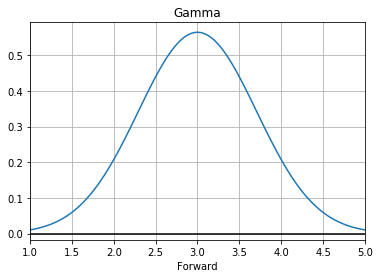

In [6]:
plot_greeks("gamma", "Gamma")

## Theta

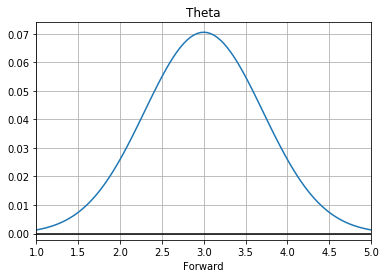

In [7]:
plot_greeks("theta", "Theta")

## Vega

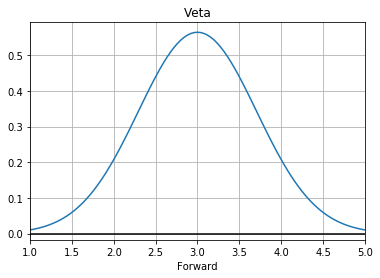

In [8]:
plot_greeks("vega", "Veta")

## Vanna

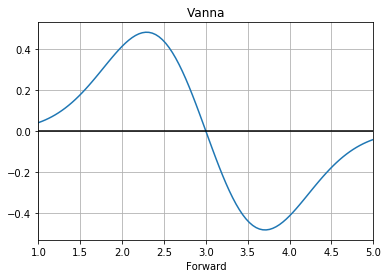

In [9]:
plot_greeks("vanna", "Vanna")

## Volga

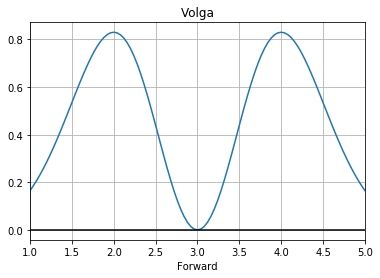

In [10]:
plot_greeks("volga", "Volga")

## Veta

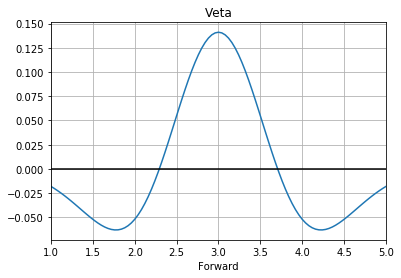

In [11]:
plot_greeks("veta", "Veta")